# Looking into different simple linear regression methods

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels

In [2]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [3]:
from scipy.stats import linregress
from statsmodels.regression.linear_model import OLS

In [4]:
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression, Lasso

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

In [5]:
tmp = os.getcwd()
os.chdir(tmp.split("/playground")[0])

from romeo.romeo import ROMEO
from romeo.utils import formula_parser

os.chdir(tmp)

# Make X and y data

In [6]:
amount_of_features = 4
X, y, coef = make_regression(n_samples=100,
    n_features=amount_of_features,
    n_informative=amount_of_features,
                             noise=5,
                             coef=True, 
                            random_state=42)

In [7]:
coef

array([86.47223763,  5.63754967, 27.34070719, 41.48195023])

# Scipy

In [8]:
if amount_of_features == 1:
    res=linregress(x=X.reshape(1,-1), y=y)
    res

    _ = plt.plot(X, y, 'o', label='original data')
    _ = plt.plot(X, res.intercept + res.slope*X, 'r', label='fitted line')
    _ = plt.legend()

# Sklearn

In [9]:
reg = LinearRegression().fit(X, y)

In [10]:
reg.coef_, reg.intercept_, reg.score(X, y)

(array([86.70482673,  5.68738212, 27.05974096, 40.58492471]),
 -0.0391720867097618,
 0.9970869093696945)

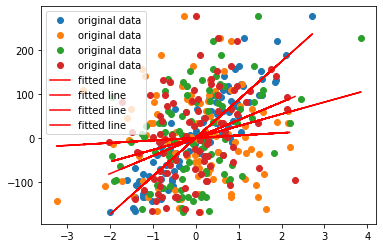

In [11]:
_ = plt.plot(X, y, 'o', label='original data')
_ = plt.plot(X, reg.intercept_ + reg.coef_*X, 'r', label='fitted line')
_ = plt.legend()

# Statsmodels

In [12]:
res = OLS(endog=y, exog=statsmodels.tools.tools.add_constant(data=X, prepend=True, has_constant='skip')).fit()

In [13]:
res.params

array([-3.91720867e-02,  8.67048267e+01,  5.68738212e+00,  2.70597410e+01,
        4.05849247e+01])

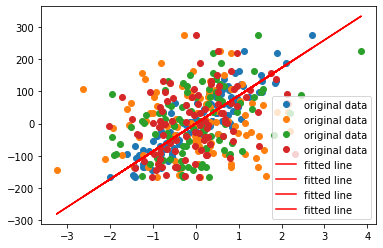

In [14]:
_ = plt.plot(X, y, 'o', label='original data')
_ = plt.plot(X, res.params[0] + res.params[1]*X, 'r', label='fitted line')
_ = plt.legend()

# Manual version using numpy

In [15]:
if amount_of_features == 1:
    x = X.reshape(1,-1)

    n = len(x)
    xmean = np.mean(x, None)
    ymean = np.mean(y, None)

    # Average sums of square differences from the mean
    #   ssxm = mean( (x-mean(x))^2 )
    #   ssxym = mean( (x-mean(x)) * (y-mean(y)) )
    ssxm, ssxym, _, ssym = np.cov(x, y, bias=1).flat

    slope = ssxym / ssxm
    intercept = ymean - slope*xmean

    # slope, intercept

    # np.vstack([x, np.ones(len(x))]).T

    # intercept, slope = np.linalg.lstsq(statsmodels.tools.tools.add_constant(data=X, prepend=True, has_constant='skip'), y, rcond=None)[0]
    # slope, intercept

    _ = plt.plot(X, y, 'o', label='original data')
    _ = plt.plot(X, intercept + slope*X, 'r', label='fitted line')
    _ = plt.legend()

In [16]:
# np.dot(x, y)
# np.matmul(X,y)

In [17]:
# X / y.reshape(-1,1)

## Learning matrix multiplication to achieve linear regression output

https://www.stat.purdue.edu/~boli/stat512/lectures/topic3.pdf

Add ones in case you wish to have the intercept returned

In [18]:
X[0:5].T

array([[ 0.85243333, -0.49300093, -1.1429703 ,  0.37569802, -1.19620662],
       [-0.66178646, -0.20812225,  0.05820872, -1.15099358, -1.10633497],
       [ 0.18645431, -0.62269952,  0.15372511,  0.11092259, -0.18565898],
       [-2.02514259,  0.28099187, -0.88385744, -0.54438272, -0.47917424]])

In [19]:
np.ones(len(X[0:5]))

array([1., 1., 1., 1., 1.])

In [20]:
x = np.vstack([np.ones(len(X)), X.T#.reshape(1,-1)
              ]
             ).T
x[0:5]

array([[ 1.        ,  0.85243333, -0.66178646,  0.18645431, -2.02514259],
       [ 1.        , -0.49300093, -0.20812225, -0.62269952,  0.28099187],
       [ 1.        , -1.1429703 ,  0.05820872,  0.15372511, -0.88385744],
       [ 1.        ,  0.37569802, -1.15099358,  0.11092259, -0.54438272],
       [ 1.        , -1.19620662, -1.10633497, -0.18565898, -0.47917424]])

Step 1: X`X

In [21]:
np.matmul(x.transpose(1,0), x)

array([[100.        ,   4.37641733,   2.24956986,   3.37458003,
         -0.98112288],
       [  4.37641733,  95.70624341,  -3.76647012,  12.82009733,
         -1.73070154],
       [  2.24956986,  -3.76647012, 107.95712708,  -3.23772973,
          1.56998234],
       [  3.37458003,  12.82009733,  -3.23772973,  89.88206826,
         -1.37435278],
       [ -0.98112288,  -1.73070154,   1.56998234,  -1.37435278,
         74.60970248]])

Step 2: (X`X)^-1

In [22]:
np.linalg.inv(np.matmul(x.transpose(1,0), x))

array([[ 0.01003589, -0.0004227 , -0.00023532, -0.00032313,  0.00012117],
       [-0.0004227 ,  0.01068484,  0.00033379, -0.00149293,  0.00020777],
       [-0.00023532,  0.00033379,  0.00929097,  0.00029307, -0.00018546],
       [-0.00032313, -0.00149293,  0.00029307,  0.01136383,  0.00016428],
       [ 0.00012117,  0.00020777, -0.00018546,  0.00016428,  0.01341642]])

Step 3: X`Y

In [23]:
np.matmul(x.transpose(1,0), y)

array([ 439.82992453, 8553.26858454,  263.4396618 , 3469.42540198,
       2849.74687256])

Step 4 (put it all together): (X'X)^-1 X'Y

In [24]:
X_trans_X_inv = np.linalg.inv(np.matmul(x.transpose(1,0), x))
X_trans_y = np.matmul(x.transpose(1,0), y)

results = np.dot(X_trans_X_inv, X_trans_y)

np.set_printoptions(suppress=True)
results

array([-0.03917209, 86.70482673,  5.68738212, 27.05974096, 40.58492471])

In [25]:
coef

array([86.47223763,  5.63754967, 27.34070719, 41.48195023])

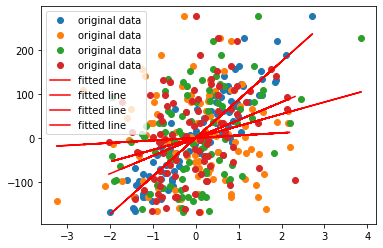

In [26]:
_ = plt.plot(X, y, 'o', label='original data')
_ = plt.plot(X, results[0] + results[1:len(results)]*X, 'r', label='fitted line')
_ = plt.legend()

## Learning matrix multiplication to achieve linear mixed models output

https://stats.idre.ucla.edu/other/mult-pkg/introduction-to-linear-mixed-models/

https://en.wikipedia.org/wiki/Mixed_model

https://m-clark.github.io/docs/mixedModels/mixedModels.html#mixed_model_3c:_general_notation

Add ones in case you wish to have the intercept returned

# Statsmodels regularized mixedLM examples

In [27]:
data = sm.datasets.get_rdataset('dietox', 'geepack').data

In [28]:
# md = smf.mixedlm("Weight ~ Time", data, groups=data["Pig"])
# mdf = md.fit(method=["lbfgs"])
# mdf.summary()

In [29]:
md = smf.mixedlm("Weight ~ Time", data, groups=data["Pig"], re_formula="~Time")
mdf = md.fit(method=["lbfgs"])
mdf.summary()

<class 'statsmodels.iolib.summary2.Summary'>
"""
           Mixed Linear Model Regression Results
===========================================================
Model:             MixedLM  Dependent Variable:  Weight    
No. Observations:  861      Method:              REML      
No. Groups:        72       Scale:               6.0372    
Min. group size:   11       Log-Likelihood:      -2217.0475
Max. group size:   12       Converged:           Yes       
Mean group size:   12.0                                    
-----------------------------------------------------------
                 Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-----------------------------------------------------------
Intercept        15.739    0.550 28.603 0.000 14.660 16.817
Time              6.939    0.080 86.925 0.000  6.783  7.095
Group Var        19.503    1.561                           
Group x Time Cov  0.294    0.153                           
Time Var          0.416    0.033                           
===========================================================

"""

In [30]:
# mdf = md.fit_regularized(method="l1", alpha=1, ptol=1e-06)
# # mdf.summary

# mdf.fe_params

In [31]:
import re

In [32]:
formula_string = "Weight ~ Time + (1 + Time | Pig)"

In [33]:
target = formula_string.replace(" ", "").split("~")[0]
fixed_effect = formula_string.replace(" ", "").split("~")[1].split("+")[0]
random_effects = re.findall("\((.*?)\)", formula_string)

In [34]:
clusters = random_effects[0].replace(" ", "").split("+")[1].split("|")[1]

In [35]:
{"target": target,
"fixed_effect": fixed_effect,
"random_effects": random_effects,
"clusters": clusters}

{'target': 'Weight',
 'fixed_effect': 'Time',
 'random_effects': ['1 + Time | Pig'],
 'clusters': 'Pig'}

In [36]:
formula_parser(formula_string)

{'target': 'Weight',
 'fixed_effect': ['Time', '(1', 'Time|Pig)'],
 'random_effect': [],
 'clusters': []}

# LMM equation

<img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/e00ba9a8e13237ca374d55bb3070aebd12a5b8e4" />

In [37]:
y = data[target]
y.head(2)

0    26.50000
1    27.59999
Name: Weight, dtype: float64

In [38]:
x = data[[fixed_effect]]
x.head(2)

,Time
0,1
1,2


In [39]:
model = Lasso(max_iter=1000, warm_start=False, fit_intercept=True, tol=1e-05)

In [40]:
_ = model.fit(X=x, y=y)

In [41]:
beta = model.coef_
beta

array([6.86232847])

In [42]:
u = data[clusters].unique()

In [43]:
u

array([4601, 4602, 4603, 4605, 4641, 4643, 4645, 4756, 4757, 4759, 4760,
       4813, 4814, 4815, 4817, 4854, 4856, 4857, 4858, 5389, 5392, 5497,
       5500, 5501, 5502, 5524, 5527, 5528, 5578, 5581, 5582, 5850, 5851,
       5852, 5862, 5865, 5866, 6055, 6056, 6057, 6058, 6207, 6208, 6211,
       6284, 6287, 6288, 6430, 6432, 6433, 6909, 6910, 6912, 8049, 8050,
       8051, 8053, 8139, 8141, 8142, 8144, 8191, 8192, 8193, 8195, 8269,
       8270, 8271, 8273, 8437, 8439, 8442])

In [44]:
len(u)

72

In [45]:
data[clusters]

0      4601
1      4601
2      4601
3      4601
4      4601
       ... 
856    8442
857    8442
858    8442
859    8442
860    8442
Name: Pig, Length: 861, dtype: int64

In [46]:
data[clusters].value_counts().sort_index()

4601    12
4602    12
4603    12
4605    12
4641    12
        ..
8271    12
8273    12
8437    12
8439    12
8442    12
Name: Pig, Length: 72, dtype: int64

In [47]:
# zeros_array = np.zeros((data.shape[0], len(u)))

In [48]:
# np.put(zeros_array[0], range(0,12), 4601)

In [49]:
# zeros_array#[0, 0:13]

In [50]:
# z = np.diag(data[clusters])
# z.shape

In [51]:
z_list = list()
for cluster_group in u:
    tmp = data.loc[data[clusters]==cluster_group, clusters]
#     print(cluster_group)

#     np.pad(tmp, (tmp.index.tolist()[0], data[clusters].shape[0] - tmp.index.tolist()[-1]+1))
    
    z_list.append(np.pad(tmp, (tmp.index.tolist()[0], data[clusters].shape[0] - tmp.index.tolist()[-1]+1)))

In [52]:
z_list[1].shape

(863,)

In [53]:
possible_Z_df = pd.DataFrame(np.vstack(z_list).T)#.head(50)

In [54]:
binary_df = np.where(possible_Z_df > 0 , 1, possible_Z_df)

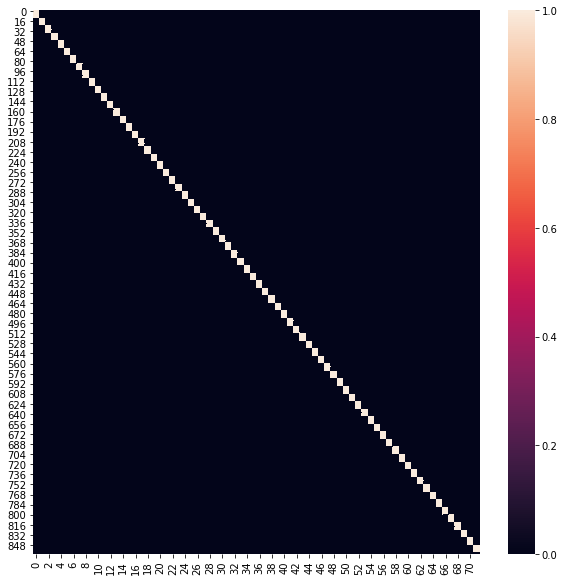

In [55]:
_ = plt.figure(figsize=(10, 10))
_ = sns.heatmap(binary_df)

In [56]:
# Z = possible_Z_df.loc[0: 860].values
Z = binary_df[0: 861]

<img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/e00ba9a8e13237ca374d55bb3070aebd12a5b8e4" />

In [57]:
np.matmul(x.values, beta).shape

(861,)

In [58]:
np.matmul(Z, u).shape

(861,)

In [59]:
pred_y = np.add(np.matmul(x.values, beta), np.matmul(Z, u))

In [60]:
model.intercept_

16.25214159377714

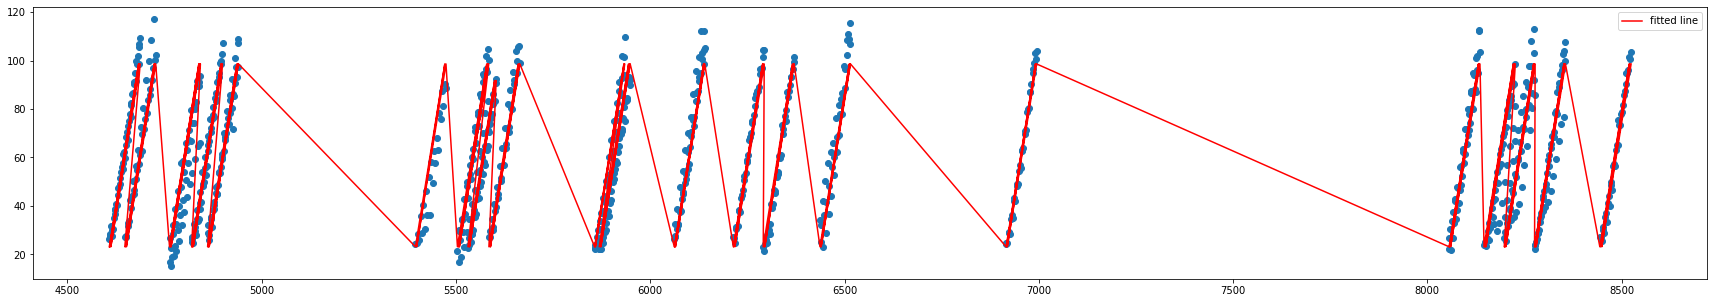

In [61]:
_ = plt.figure(figsize=(30, 5))
_ = plt.scatter(pred_y, y)
_ = plt.plot(pred_y, model.intercept_ + beta*x, 'r', label='fitted line')
_ = plt.legend()

In [62]:
# re.match(r"^.*\|(.*)\).*$", formula_string).group(0)

In [63]:
# re.split(r"^.*\|(.*)\).*$", formula_string)

In [64]:
# re.split(r"'|'", formula_string)